In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.utils import plot_model

In [4]:

abi_input = tf.keras.Input((32,32,3))
uh = tf.keras.layers.Conv2D(32,3)(abi_input) 
y = tf.keras.activations.relu(uh)
y = tf.keras.layers.MaxPooling2D((2,2))(y)
a = tf.keras.layers.Flatten()(y)
b = tf.keras.layers.Dense(64, activation = 'relu')(a)
abi_output = tf.keras.layers.Dense(10)(b) 


cool_model = tf.keras.Model(inputs = abi_input, outputs = abi_output)



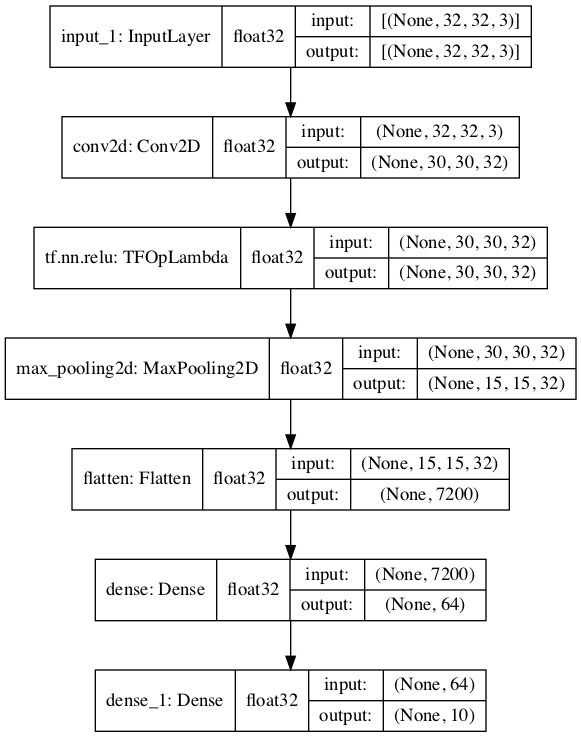

In [6]:
plot_model(cool_model, show_shapes=True, show_dtype=True, expand_nested=True)

In [1]:
! pip install -q tensorflow_datasets

tensorboard 2.2.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.22.0 which is incompatible.
tensorflow-metadata 0.29.0 has requirement absl-py<0.13,>=0.9, but you'll have absl-py 0.7.1 which is incompatible.


In [4]:
import tensorflow_datasets as tfds

tfds.disable_progress_bar() 

(train_ds, validation_ds, test_ds), ds_info = tfds.load( 
    "cats_vs_dogs", 
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"], 
    as_supervised=True,
    with_info=True
)

print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print(
    "Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds)
)
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))

Number of training samples: 9305
Number of validation samples: 2326
Number of test samples: 2326


(262, 350, 3)
(409, 336, 3)
(493, 500, 3)
(375, 500, 3)
(240, 320, 3)
(100, 100, 3)
(216, 182, 3)
(375, 500, 3)
(377, 500, 3)


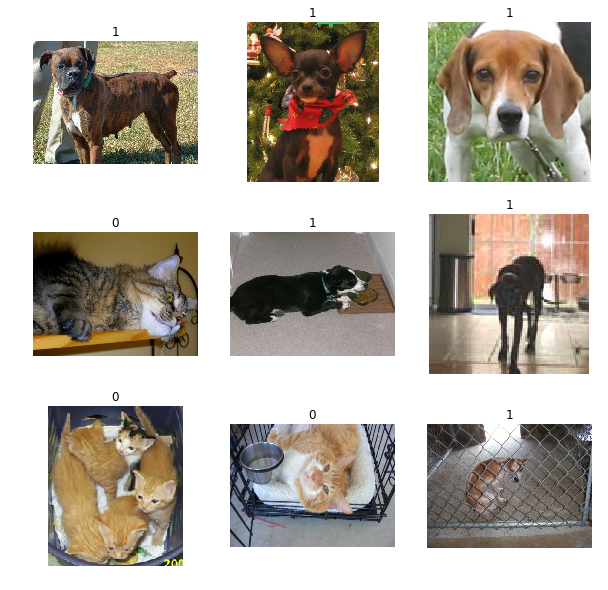

In [5]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    print(image.shape)
    plt.title(int(label))
    plt.axis("off") 

In [6]:
size = (224, 224)


# x.map(some_function) # assuming x=[0, 1, 2 ,3....] this line returns output of 
# [some_function(0), some_function(1), some_function(2), ....] ie. applying some_function to each elemnt of x
# if overwrite x (ie if x = x.map(some_function)) then x = [some_function(0), some_function(1), some_function(2), ....]



train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y)) #dis also fren
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))


batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10) 
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)



In [7]:

mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), include_top=False)
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


In [8]:
mobilenet_model.trainable = False
input_layer = tf.keras.Input((224, 224, 3))
x = preprocess_input(input_layer)
x = mobilenet_model(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(, training=False64, activation="relu")(x)
out = tf.keras.layers.Dense(1)(x)

transfer_model = tf.keras.Model(inputs=input_layer, outputs=out)
transfer_model.summary() 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281  

In [9]:
transfer_model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), metrics = ['accuracy'])

In [ ]:
transfer_model.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
291/291 [==============================] - 30s 104ms/step - loss: 0.0834 - accuracy: 0.9702 - val_loss: 0.0388 - val_accuracy: 0.9888
Epoch 2/20
291/291 [==============================] - 29s 98ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0323 - val_accuracy: 0.9910
Epoch 3/20
291/291 [==============================] - 29s 98ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0302 - val_accuracy: 0.9918
Epoch 4/20
291/291 [==============================] - 29s 99ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0293 - val_accuracy: 0.9910
Epoch 5/20
 43/291 [===>..........................] - ETA: 19s - loss: 0.0265 - accuracy: 0.9906